In [18]:
import theano
import numpy

from theano import tensor
from fuel.streams import ServerDataStream

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from blocks.algorithms import GradientDescent, Adam
from blocks.graph import ComputationGraph
import cv2
import numpy as np

In [3]:
images = tensor.ftensor4('images')
labels = tensor.ftensor4('labels')

In [4]:
train_stream = ServerDataStream(('images', 'labels'), False, hwm=10)

In [6]:
it = train_stream.get_epoch_iterator()

In [15]:
data = it.next()

In [16]:
def get_im_cv2(path, img_rows, img_cols, color_type=1):
    if color_type == 1:
        img = cv2.imread(path, 0)
    elif color_type == 3:
        img = cv2.imread(path)
    resized = cv2.resize(img, (img_cols, img_rows))
    return resized

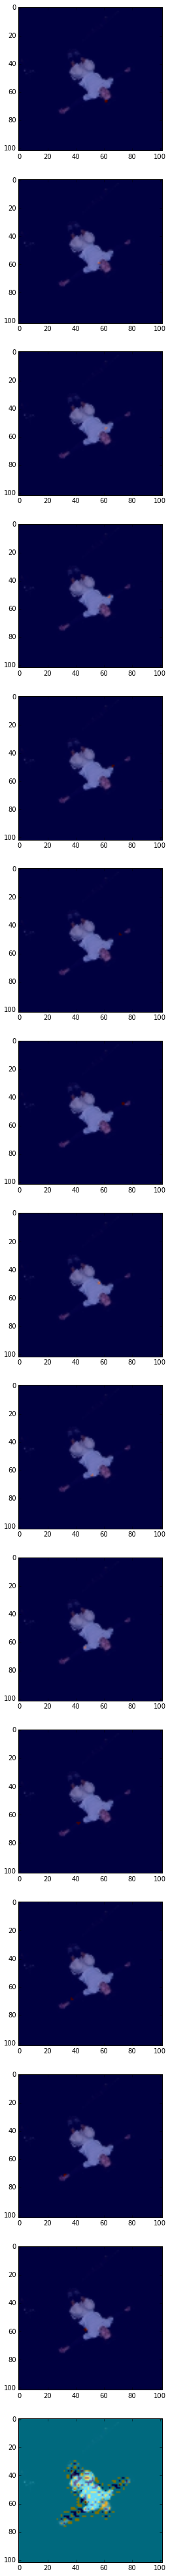

In [82]:
j = 5
plt.figure(figsize=(30,70))
for i in range(15):
    plt.subplot(15, 1, i+1)
    im =  cv2.resize(np.rollaxis(np.rollaxis(data[0][j], 2),2)[:,:,::-1], (102, 102))
    plt.imshow(im); plt.hold(True)
    plt.imshow(cv2.resize(data[1][j][i], (102, 102)), alpha=.5)